# Project: 1 million Sudoku games (Analysis 3 Different Approaches!) <br> Part 1

$By:$
<p><a href="https://www.linkedin.com/in/mosta-ashour/">
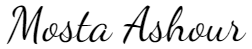 <br> <br> <br>
</a></p>

## Table of Contents
<ul>
<li><a href="#intro"><b>Introduction</b></a></li>
    <ul>
        <li><a href="#What is Sudoku?"><b>What is Sudoku?</b></a></li>
        <li><a href="#Dataset Explanation"><b>Dataset Explanation</b></a></li>
    </ul>
<li><a href="#Approaches Explanation"><b>Approaches Explanation</b></a></li>
    <ul>
        <li><a href="#approach1"><b>1. Backtracking Algorithm</b></a></li>
        <li><a href="#approach2"><b>2. Naked Twin Approach (Implementation 1)</b></a></li>
        <li><a href="#approach3"><b>3. Naked Twin Approach (Implementation 2)</b></a></li>
    </ul>
<li><a href="#Analyse"><b>Analyse the results</b></a></li>
<li><a href="#conclusion"><b>Conclusion</b></a></li>
</ul>

## Introduction <a id='intro'></a>
> Welcome to my humble Python Notebook! In this notebook, we will explore the fascinating world of Sudoku. 

### What is Sudoku? <a id='What is Sudoku?'></a>
- Sudoku is a popular logic-based puzzle that has captivated puzzle enthusiasts worldwide. It involves a 9x9 grid, divided into nine 3x3 sub-grids, and the objective is to fill in the grid with digits from 1 to 9 in such a way that each column, each row, and each sub-grid contains all the numbers from 1 to 9 without any repetition.
- Sudoku puzzles generally start with some of the cells already filled in, and the solver's task is to complete the remaining cells following the rules of the game. The puzzles vary in difficulty, with some being relatively straightforward and others requiring advanced problem-solving techniques.

In this notebook, we will compare and analysis multiple Sudoku solver implementation using Python. We will explore different approaches and algorithms to tackle Sudoku puzzles of varying complexity.
The main goal in this notebook is to compare different approaches and techniques in solving Sudoku. So let's dive in and embark on our Sudoku-solving adventure!

### Dataset Explanation: <a id='Dataset Explanation'></a>
- We're using the [1 million Sudoku games](https://www.kaggle.com/datasets/bryanpark/sudoku) dataset. This dataset contains 1 million Sudoku puzzles. Each row in the dataset consists of two columns: 
  - quizzes: The quizzes column represents the initial incomplete Sudoku puzzle with some cells already filled in.
  - solutions: The solutions column contains the complete solution to each puzzle.

**Firstly, let's start by importing the required packages:**

In [1]:
import time
import random

import numpy as np
import pandas as pd

from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from multiprocessing import Pool

# import our three approaches
from solution_1 import *
from solution_2 import *
from solution_3 import *


# defining the multi-processing function
def parallelize_dataframe(df, func):
    num_partitions = 100 #number of partitions to split dataframe
    num_cores = 8 #number of cores on your machine

    df_split = np.array_split(df, num_partitions)
    pool = Pool(num_cores)
    pool.map(func, df_split)
    pool.close()
    pool.join()

- Since working with the entire dataset of 1 million puzzles can be time-consuming, we will select a smaller sample of 50,000 puzzles for our analysis. To ensure a representative sample, we will use simple random sampling, which is a basic probability sampling method. This method selects a subset of items from the larger population (in this case, the Sudoku puzzles) randomly and with equal probability.

**Let's perform the simple random sampling to create our sample dataset:**

In [2]:
# Load the entire dataset
df = pd.read_csv("sudoku.csv")

# Set the random seed for reproducibility
random.seed(42)

# Perform simple random sampling to select 50,000 puzzles
sample_size = 50000
df = df.sample(n=sample_size, random_state=0)

# format a dataframe to store our results
df_res = pd.DataFrame(columns=["approach", "mode", "speed"])

df.head()

,quizzes,solutions
157105,0071000520006800090930240807084090036010020000...,8671934522146857395937241867284695136413529783...
374554,0086300004001075009000002631730050040020809050...,2586391474361275989175482631739658246427839158...
688694,0090000407560000300007009510015020003800160024...,8193256477561492382347689516915823743874165924...
265381,1005038040004200700736000008100005200900471302...,1625738949584213764736982518143695275962471382...
955415,4065090037900208600108000000000360908507000340...,4865192737953248613128679452471365988517926346...


- By using simple random sampling, we ensure that each puzzle in the original dataset has an equal chance of being included in our sample. This smaller sample size will allow us to work with a more manageable amount of data while still capturing the characteristics of the larger population.

<a id='Approaches Explanation'></a>

We're going to compare three different approaches, all of which guarantee a 100% accuracy in solving Sudoku puzzles. Let's have a quick overview of each approach:

1. **Backtracking Algorithm:**<br>
The first approach is the Backtracking Algorithm. In this method, each cell is tested for a valid number, moving "back" when there is a violation, and moving forward again until the puzzle is solved. A Sudoku puzzle can be designed to challenge the brute force algorithm. For more detailed information on the Backtracking Algorithm, you can refer to the [Wikipedia article on Sudoku solving algorithms](https://en.wikipedia.org/wiki/Sudoku_solving_algorithms).

2. **Naked Twin Approach (Implementation 1):**<br>
The second approach is based on the Naked Twin strategy, but with a specific implementation. The concept of Naked Twin states that if two connected positions have the same set of two values, then all the other linked missing values should not have those values. Consequently, we can eliminate those values from the list of possible values for the linked positions. For a better understanding of this approach, you can check the following website [here](https://www.sudokudragon.com/guidenakedtwins.htm). <br> And you can refer to the [Medium article by anand pathak](https://anandpathak69.medium.com/solving-sudoku-using-naked-twin-strategies-f7ed23ea867f) for more information and explanation.

3. **Naked Twin Approach (Implementation 2):**<br>
The third approach also utilizes the Naked Twin strategy but with a different implementation,This approach is explained in detail by YASH CHOUDHARY in Kaggle's notebook, you can check it in the following [link](https://www.kaggle.com/code/yashchoudhary/deep-sudoku-solver-multiple-approaches).

Now that we have introduced the three approaches, we can proceed with our analysis, exploring and comparing the results of each approach.

**Let's check how many clues in our sample data:**

In [3]:
# count clues
df_clues = df.quizzes.apply(lambda x: 81-x.count('0'))

# count clues groups
df_clues = df_clues.value_counts()

# rename columns
df_clues = df_clues.reset_index()

df_clues = df_clues.rename(columns={'index': 'clues'}).sort_values('clues', ascending=False)

df_clues

,clues,quizzes
4,36,638
2,35,9871
0,34,22748
1,33,13307
3,32,3012
5,31,386
6,30,34
7,29,4


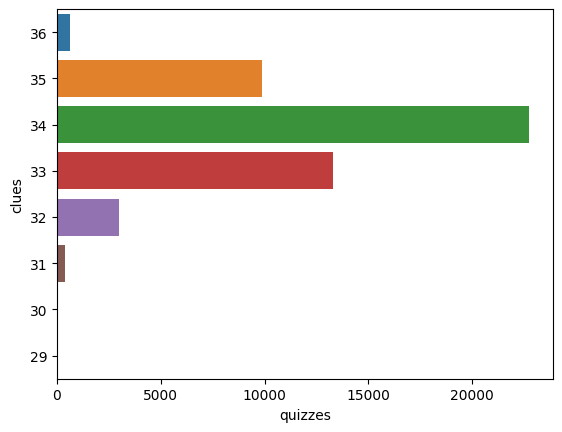

In [4]:
plt.figure
sns.barplot(x='quizzes', y='clues', data=df_clues, orient='h', order=df_clues.clues)
plt.show();

## 1. Backtracking Algorithm: <a id='approach1'></a>
**Now, let's explore the slow version of the Backtracking Algorithm to understand how it works:**

In [5]:
# get the first sudoku puzzle
grid = df.iloc[0, 0]

# convert hotline puzzle into 9x9 grid using list comprehension
grid = [[int(grid[i*9+j]) for j in range(9)] for i in range(9)]

grid

[[0, 0, 7, 1, 0, 0, 0, 5, 2],
 [0, 0, 0, 6, 8, 0, 0, 0, 9],
 [0, 9, 3, 0, 2, 4, 0, 8, 0],
 [7, 0, 8, 4, 0, 9, 0, 0, 3],
 [6, 0, 1, 0, 0, 2, 0, 0, 0],
 [0, 5, 0, 0, 0, 0, 0, 6, 0],
 [4, 0, 6, 0, 7, 0, 8, 0, 0],
 [0, 0, 2, 5, 3, 8, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 9, 7]]

**Let's go now with our testing with no speed limitation:**

In [6]:
%%time

# reformating quizzes from hotline to 9x9 grids
grids = df.quizzes.apply(lambda x: [[int(x[i*9+j]) for j in range(9)] for i in range(9)])

# save the current time to calculate the approac speed
tic = time.time()

# assign variable to count how much had been solved correctly
count = 0

for suduko in tqdm(grids):
    if solver_1(suduko, 0, 0, version='fast'):
        count+=1

toc = time.time()

# Save results
df_res.loc[len(df_res)] = ['Backtracking Algorithm', 'normal', toc-tic]

print("{}/{} solved!! That's {}% accuracy.\n".format(count, df.shape[0],(count/len(grids))*100))

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:13<00:00, 375.90it/s]

50000/50000 solved!! That's 100.0% accuracy.

Wall time: 2min 15s


**Finally, let's test the approaches using multi-processing, which utilizes the full processing power available by distributing the iterations across all CPU cores:**

In [7]:
%%time

# reformating quizzes from hotline to 9x9 grids
grids = df.quizzes.apply(lambda x: [[int(x[i*9+j]) for j in range(9)] for i in range(9)])

tic = time.time()

# Use our pre-defined multiporcessing function
parallelize_dataframe(grids, solve_and_verify_1)

toc = time.time()

df_res.loc[len(df_res)] = ['Backtracking Algorithm', 'multi-processing', toc-tic]

Wall time: 26.5 s


## 2. Naked Twin Approach (Implementation 1): <a id='approach2'></a>
**Now, let's delve into the Naked Twin Approach. Before we proceed with the testing, let's gain a better understanding of how it works:**

**The main steps of this algorithm are as follows:**

- Loop over all empty cells marked as zero "0":
  - Determine the possible numbers that can be placed in this cell by eliminating any numbers that already appear in its corresponding row, column, or the 3x3 square it belongs to.
    - If only one possible number remains:
      - Replace the "0" with that number, filling the cell accordingly.
    - Otherwise:
      - Mark the cell as containing all the possible numbers.

**Now, let's focus on the Naked Twin technique:**
- Loop over rows, columns, and each 3x3 square:
  - Identify if there is a Naked Pair, which refers to a situation where two cells within a row, column, or 3x3 square have the exact same pair of possible numbers.
    - If a Naked Pair is detected:
      - Eliminate this pair of numbers from the other cells within the same row, column, or 3x3 square.
    - "Plus" if any number appears only once among all the cells.
      - Confirm this number as the correct value for the corresponding cell.

This technique closely mimics the logical reasoning employed by humans when solving Sudoku puzzles. Just like human solvers, the algorithm examines each cell and considers the possible numbers based on the constraints of the rows, columns, and 3x3 squares. The additional step of identifying numbers that appear only once throughout the grid aligns with the human strategy of looking for unique candidates in order to make confident placements.

By incorporating this step, the algorithm captures the essence of human-solving techniques, making it more intuitive and aligned with human thought processes. This enhances the overall effectiveness of the Naked Twin Approach (Implementation 1) and brings it closer to the way humans approach Sudoku puzzle solving.

**Example shows Naked Pairs over rows:**

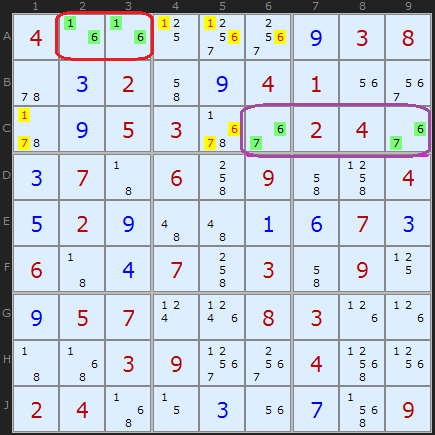

**Example shows Naked Pairs over 3x3 squares:**

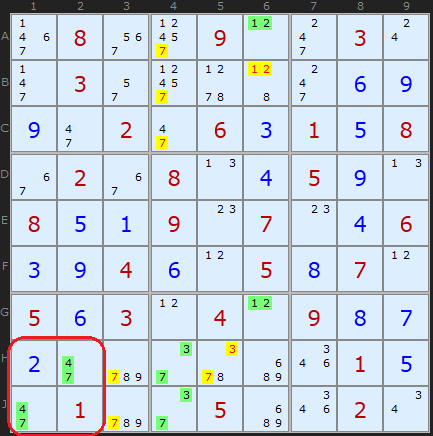

For more detailed explanations and visualizations, you can refer to the following link: https://www.sudokuwiki.org/Naked_Candidates


**Let's go now with our testing the algorithm speed:**

In [8]:
%%time
tic = time.time()

# assign variable to count how much had been solved correctly
count = 0

for row in tqdm(df.iterrows()):
    if (solver_2(row[1]["quizzes"]) == row[1]["solutions"]):
        count+=1

toc = time.time()

# Save results
df_res.loc[len(df_res)] = ['Naked Twin (1)', 'normal', toc-tic]

print("{}/{} solved!! That's {}% accuracy.\n".format(count, df.shape[0],(count/df.shape[0])*100))

50000it [02:13, 375.79it/s]

50000/50000 solved!! That's 100.0% accuracy.

Wall time: 2min 13s


**Testing the approach using Multi-processing:**

In [9]:
%%time

tic = time.time()

# Use our pre-defined multiporcessing function
parallelize_dataframe(df, solve_and_verify_2)

toc = time.time()

# Save results
df_res.loc[len(df_res)] = ['Naked Twin (1)', 'multi-processing', toc-tic]

Wall time: 20.5 s


## 3. Naked Twin Approach (Implementation 2): <a id='approach3'></a>
In this approach, we are still using the Naked Twin technique, but the implementation differs from the previous one. The code for this approach is sourced from a notebook available at the following link: [kaggle.com/code/yashchoudhary/deep-sudoku-solver-multiple-approaches](https://www.kaggle.com/code/yashchoudhary/deep-sudoku-solver-multiple-approaches#Normal-Approach-#2).

The objective of comparing different implementations is to evaluate their performance and determine which approach is more efficient.

**Now, let's proceed with testing the speed of this approach:**

In [10]:
%%time
tic = time.time()

# assign variable to count how much had been solved correctly
count = 0

for row in tqdm(df.iterrows()):
    if (solve_3(row[1]["quizzes"]) == grid_values(row[1]["solutions"])):
        count+=1
        
toc = time.time()

# Save results
df_res.loc[len(df_res)] = ['Naked Twin (2)', 'normal', toc-tic]

print("{}/{} solved!! That's {}% accuracy.\n".format(count, df.shape[0],(count/df.shape[0])*100))

50000it [02:52, 290.43it/s]

50000/50000 solved!! That's 100.0% accuracy.

Wall time: 2min 52s


**Testing the approach using Multi-processing:**

In [11]:
%%time

tic = time.time()

# Use our pre-defined multiporcessing function
parallelize_dataframe(df, solve_and_verify_3)

toc = time.time()

# Save results
df_res.loc[len(df_res)] = ['Naked Twin (2)', 'multi-processing', toc-tic]

Wall time: 27.4 s


**For now we're done getting our results which we can start to analysis now**

## Analyse the results: <a id='Analyse'></a>

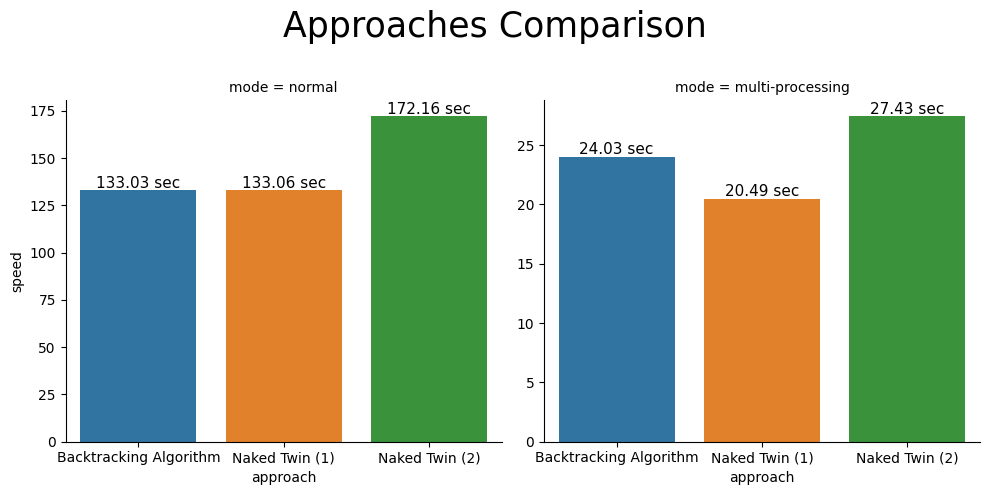

In [12]:
# plot 
g = sns.FacetGrid(data=df_res, col='mode', hue="approach", sharey=False, height=5)
g.map(sns.barplot, "approach", "speed", palette="tab10", order=df_res.approach.unique())
    
# show each bar seconds on the plot
for ax in g.axes[0]:
    for p in ax.patches:
        h = p.get_height()
        w = p.get_width()
        ax.annotate("%.2f sec" % h, (p.get_x() + w / 2., h),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')

# customize the figure title
g.fig.subplots_adjust(top=0.80)
g.fig.suptitle("Approaches Comparison", fontsize=25)
plt.show();

## Conclusion: <a id='conclusion'></a>
- **Results over modes**: As shown in the plot above, the multi-processing mode outperformed the normal mode. By utilizing multi-processing, which distributes the iterations across all CPU cores, we achieved significantly better results in terms of execution time.
- **Results over Approaches:** 
  - Comparing the different approaches, we observed that there was not a significant difference in the success percentage between the approaches in both modes. However, when comparing them against the *Backtracking Algorithm*, which serves as our baseline algorithm, our implementation of the *Naked Twin approach (1)* showed slightly better performance. This result is surprising considering that the implementation of the *Naked Twin approach* is more complex compared to the *Backtracking Algorithm*. 
  - It is important to note that the dataset used for testing may not provide a comprehensive assessment of the approaches, as it lacks information such as difficulty levels. In the next notebook, we will test the approaches using a larger dataset containing 3 million Sudoku puzzles, which is more informative.

While we were able to surpass the Backtracking Algorithm with our implementation, further exploration is needed to compare the approaches in different scenarios. Stay tuned for the next part, where we will delve deeper into the analysis.

> **For now, take care everyone, and may your journey be filled with success as you pursue your dreams and reach for the stars!** 🙏🌹<br>
> **Peace. 👋**